In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [3]:
# loading the dataset
flight = pd.read_csv('flight.csv', sep=',')
flight.head(10)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
5,2076,196,0,Yes,Yes,Yes,Friday,No,Yes,435.670,1623.74,4
6,1100,214,0,No,Yes,Yes,Wednesday,No,No,270.080,1279.40,2
7,2012,200,0,Yes,Yes,Yes,Friday,No,Yes,467.290,1687.73,4
8,1055,203,0,No,Yes,Yes,Sunday,No,Yes,407.955,1468.41,2
9,1123,204,0,No,No,Yes,Saturday,No,Yes,349.315,1475.21,2


In [4]:
# inspecting the dataset
print(flight.shape)
print(flight.columns.to_list())
flight.info()

(129780, 12)
['miles', 'passengers', 'delay', 'inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye', 'weekend', 'coach_price', 'firstclass_price', 'hours']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 

## Univariate Analysis

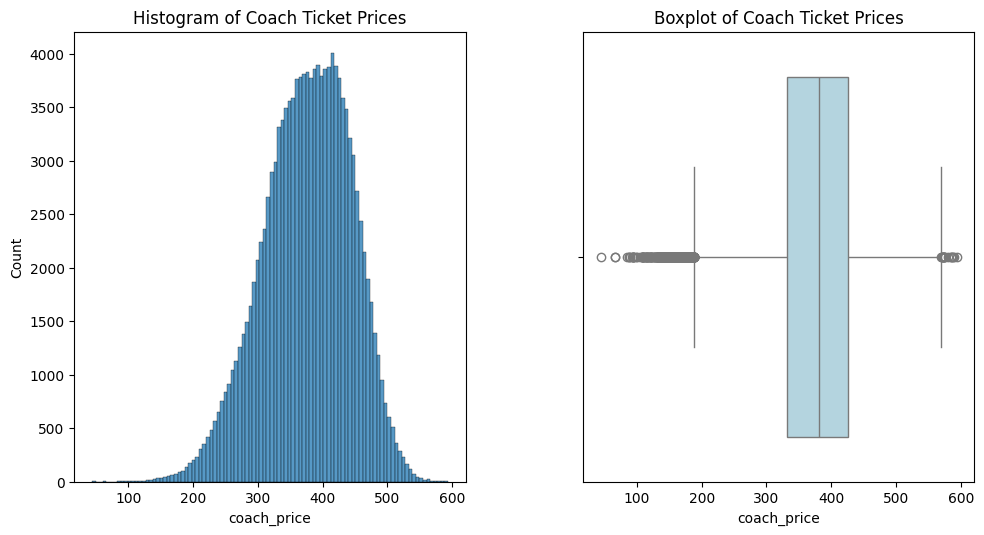

Minimum coach price: 44.41
Maximum coach price: 593.63
Mean coach price: 376.59
Median coach price: 380.56


In [5]:
# 1 coach ticket prices investigation
coach_prices = flight['coach_price']

plt.figure(figsize=(10, 5))
# creating a histogram of coach ticket prices
plt.subplot(1, 2, 1)
sns.histplot(coach_prices, bins=100)
plt.title('Histogram of Coach Ticket Prices')
# creating a boxplot of coach ticket prices
plt.subplot(1, 2, 2)
sns.boxplot(x=coach_prices, color='lightblue')
plt.title('Boxplot of Coach Ticket Prices')
# adjusting the layout
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)
plt.show()
# plt.clf()
# calculating and printing statistics for coach ticket prices
min_price = np.min(coach_prices)
max_price = np.max(coach_prices)
mean_price = np.mean(coach_prices)
median_price = np.median(coach_prices)
print(f"Minimum coach price: {min_price:.2f}")
print(f"Maximum coach price: {max_price:.2f}")
print(f"Mean coach price: {mean_price:.2f}")
print(f"Median coach price: {median_price:.2f}")

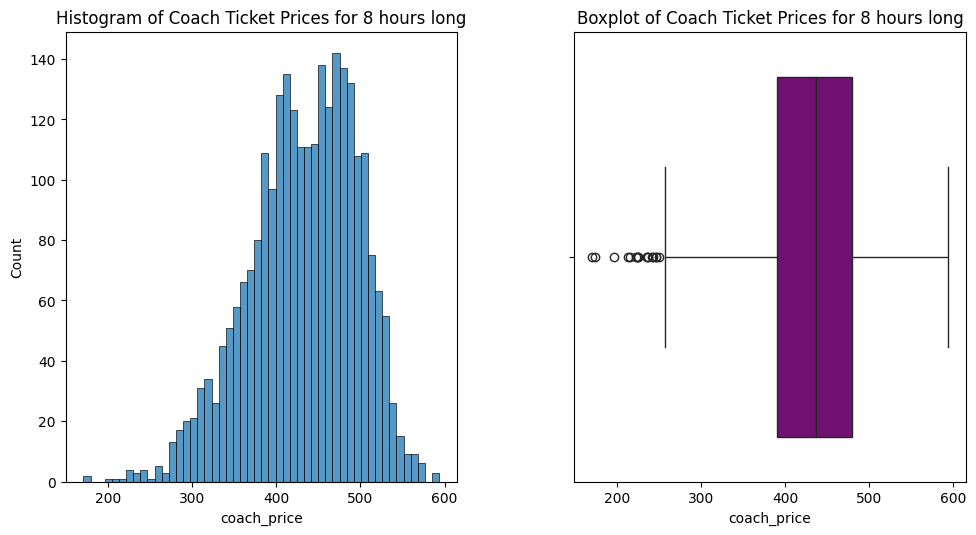

Minimum coach price of 8 hours flight: 170.77
Maximum coach price of 8 hours flight: 593.63
Mean coach price of 8 hours flight: 431.83
Median coach price of 8 hours flight: 437.12


In [6]:
# 2 visualize the coach ticket prices for flights that are 8 hours long
# filtering the dataset for flights that are 8 hours long
filt_8_hours = (flight['hours'] == 8)
flight_8_hours = flight[filt_8_hours]
coach_prices_8_hours = flight_8_hours['coach_price']

plt.figure(figsize=(10, 5))
# creating a histogram of coach ticket prices
plt.subplot(1, 2, 1)
sns.histplot(coach_prices_8_hours, bins=50)
plt.title('Histogram of Coach Ticket Prices for 8 hours long')
# creating a boxplot of coach ticket prices
plt.subplot(1, 2, 2)
sns.boxplot(x=coach_prices_8_hours, color='purple')
plt.title('Boxplot of Coach Ticket Prices for 8 hours long')
# adjusting the layout
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)
plt.show()
# plt.clf()
# calculating and printing statistics for coach ticket prices
min_price = np.min(coach_prices_8_hours)
max_price = np.max(coach_prices_8_hours)
mean_price = np.mean(coach_prices_8_hours)
median_price = np.median(coach_prices_8_hours)
print(f"Minimum coach price of 8 hours flight: {min_price:.2f}")
print(f"Maximum coach price of 8 hours flight: {max_price:.2f}")
print(f"Mean coach price of 8 hours flight: {mean_price:.2f}")
print(f"Median coach price of 8 hours flight: {median_price:.2f}")


The $500 tickets of 8 hours flight are close to the mean price. This price is closer to summary statistics than at previous case, but it seems that $500 price is not a common price for 8 hours flight. It is more likely that the price of 8 hours flight is around $400 and below.

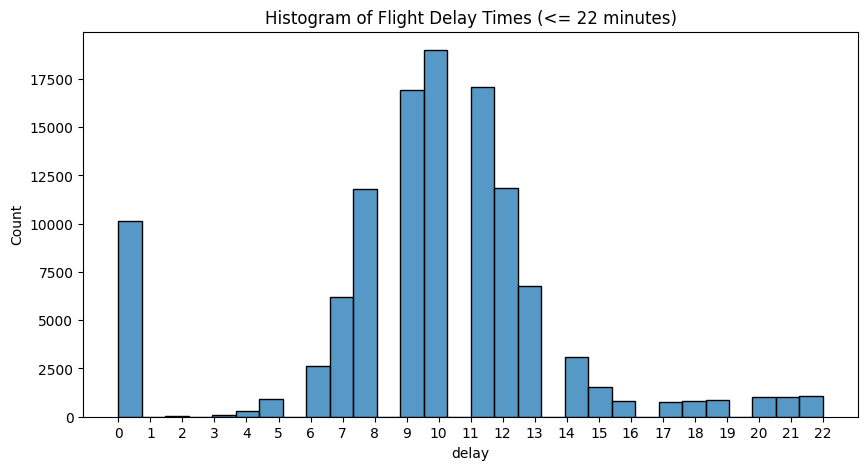

The average flight delay time is 13.16 minutes.
The most common flight delay time is 10.00 minutes.


In [7]:
# 3 flight delay times distribution investigation (note: flight delay is in minutes)
flight_delay = flight['delay']
# subsetting the data to only include flights with delay times less than minutes
delay = 22
filt_delay = (flight_delay <= delay)
flight_delay_filtered = flight_delay[filt_delay]
plt.figure(figsize=(10, 5))
# creating a histogram of flight delay times
ax = plt.subplot()
sns.histplot(data=flight_delay_filtered, bins=30)
plt.title(f'Histogram of Flight Delay Times (<= {delay} minutes)')
# setting x-ticks to unique values of flight delay times
ax.set_xticks(flight_delay_filtered.unique())
plt.show()

print(f"The average flight delay time is {np.mean(flight_delay):.2f} minutes.")
print(f"The most common flight delay time is {np.median(flight_delay):.2f} minutes.")

## Bivariate Analysis

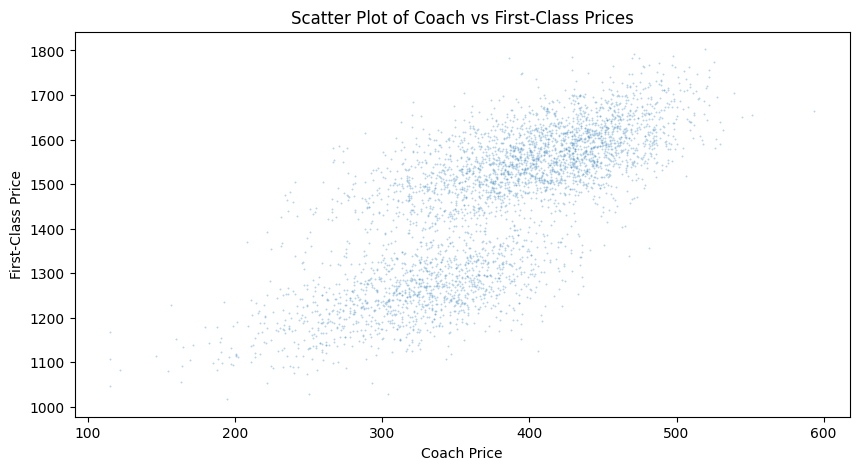

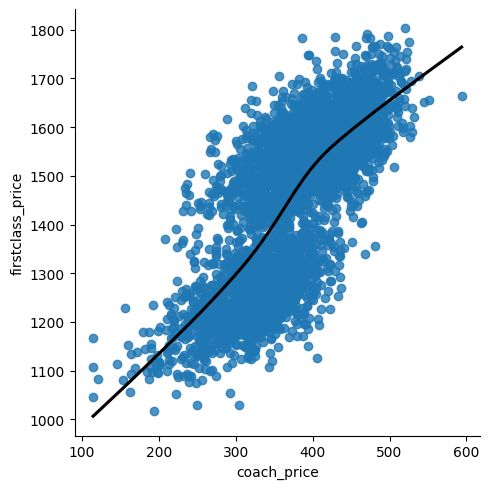

In [ ]:
# 4 relationship between coach and first-class prices
plt.figure(figsize=(10, 5))

# creating a scatter plot of coach vs first-class prices
# because too many values, take a random subset from our dataset
pers = 0.03  # % of the dataset
flight_sub = flight.sample(n=int(flight.shape[0] * pers))
# creating a scatter plot of subsetted coach vs first-class prices
sns.scatterplot(data=flight_sub, x='coach_price', y='firstclass_price', alpha=0.3, s=2)
plt.title('Scatter Plot of Coach vs First-Class Prices')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')

# adding lowess regression line
sns.lmplot(data=flight_sub, x='coach_price', y='firstclass_price', line_kws={'color': 'black'}, lowess=True)


plt.show()

It is clear from this chart that there is a positive relationship between coach prices and first clac prices.

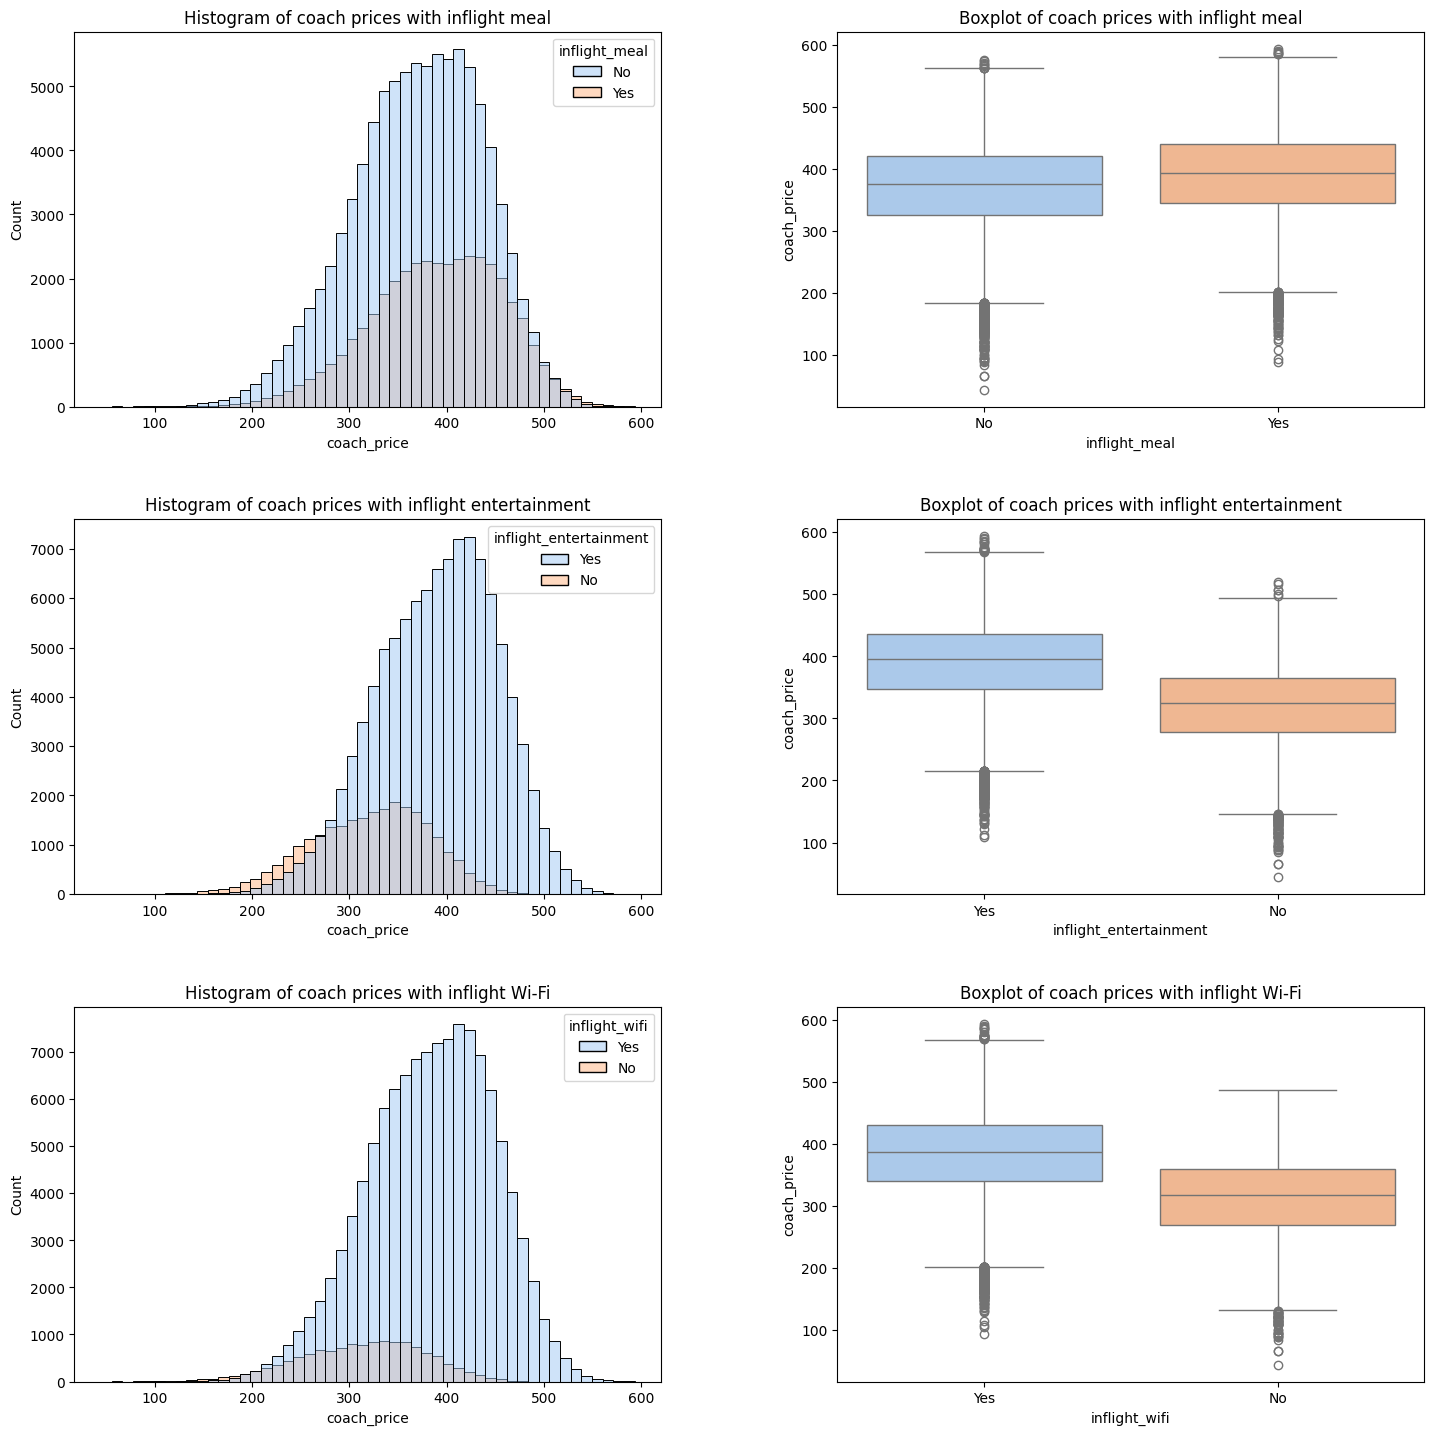

In [9]:
# 5 relationship between coach prices and inflight features:
#  inflight meal, inflight entertainment, and inflight WiFi

plt.figure(figsize=(15, 15))

# creating a histogram of coach prices for flights with inflight meal
plt.subplot(3, 2, 1)
sns.histplot(data=flight, x='coach_price', hue='inflight_meal', bins=50, palette='pastel')
plt.title('Histogram of coach prices with inflight meal')
# creating a boxplot of coach prices for flights with inflight meal
plt.subplot(3, 2, 2)
sns.boxplot(data=flight, x='inflight_meal', hue='inflight_meal', y='coach_price', palette='pastel')
plt.title('Boxplot of coach prices with inflight meal')

# creating a histogram of coach prices for flights with inflight entertainment
plt.subplot(3, 2, 3)
sns.histplot(data=flight, x='coach_price', hue='inflight_entertainment', bins=50, palette='pastel')
plt.title('Histogram of coach prices with inflight entertainment')
# creating a boxplot of coach prices for flights with inflight meal
plt.subplot(3, 2, 4)
sns.boxplot(data=flight, x='inflight_entertainment', hue='inflight_entertainment', y='coach_price', palette='pastel')
plt.title('Boxplot of coach prices with inflight entertainment')

# creating a histogram of coach prices for flights with inflight wi-fi
plt.subplot(3, 2, 5)
sns.histplot(data=flight, x='coach_price', hue='inflight_wifi', bins=50, palette='pastel')
plt.title('Histogram of coach prices with inflight Wi-Fi')
# creating a boxplot of coach prices for flights with inflight meal
plt.subplot(3, 2, 6)
sns.boxplot(data=flight, x='inflight_wifi', hue='inflight_wifi', y='coach_price', palette='pastel')
plt.title('Boxplot of coach prices with inflight Wi-Fi')

# adjusting the layout
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)
plt.show()

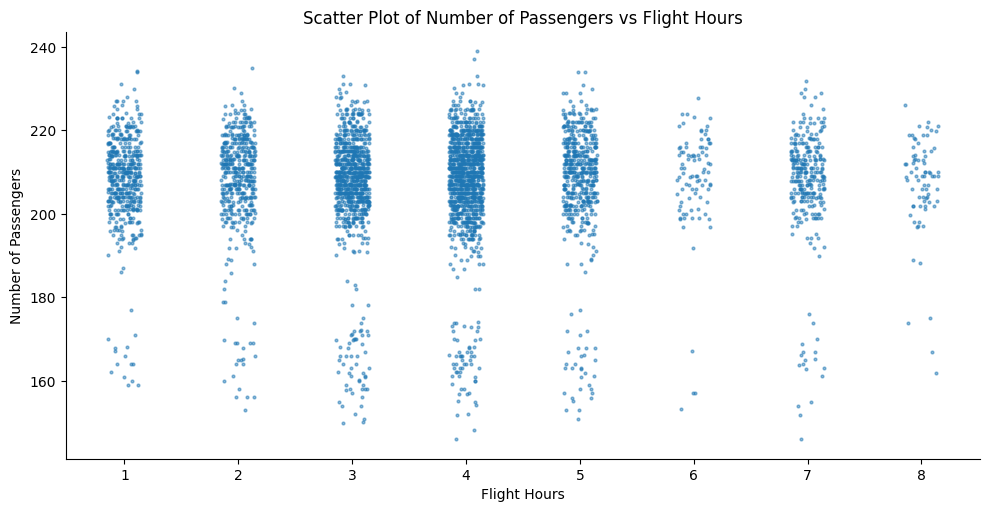

In [ ]:
# 6 how does the number of passengers change in relation to the length of flights
# using subsetted data
passengers = flight_sub['passengers']
hours = flight_sub['hours']

# creating a scatter plot of number of passengers vs flight hours
sns.lmplot(data=flight_sub, x='hours', y='passengers', x_jitter=0.15, y_jitter=0.15, fit_reg=False, scatter_kws={'alpha': 0.5, 's': 4}, height=5, aspect=2)
plt.title('Scatter Plot of Number of Passengers vs Flight Hours')
plt.xlabel('Flight Hours')
plt.ylabel('Number of Passengers')
plt.show()

There are significantly fewer data points at 6 and 8 hours compared to the other hours.

There is a break in the distribution of passengers around 180 (very few flights have around 180 passengers)

## Multivariate Analysis

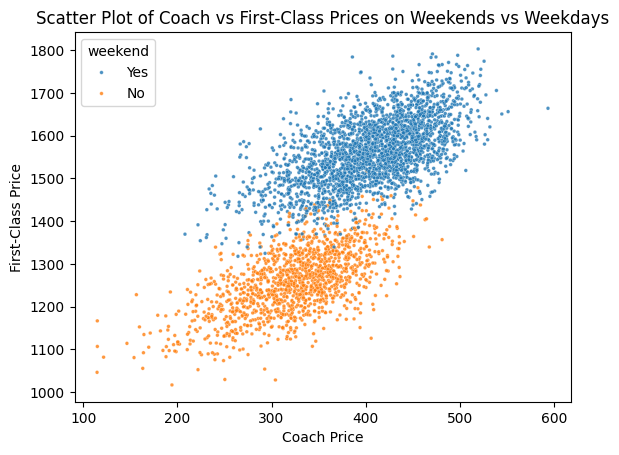

In [ ]:
# 7 relationship between coach and first-class prices on weekends compared to weekdays
sns.scatterplot(data=flight_sub, x='coach_price', y='firstclass_price', hue='weekend', alpha=0.8, s=7)
plt.title('Scatter Plot of Coach vs First-Class Prices on Weekends vs Weekdays')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.show()


On average, weekend tickets are more expensive than weekday tickets.

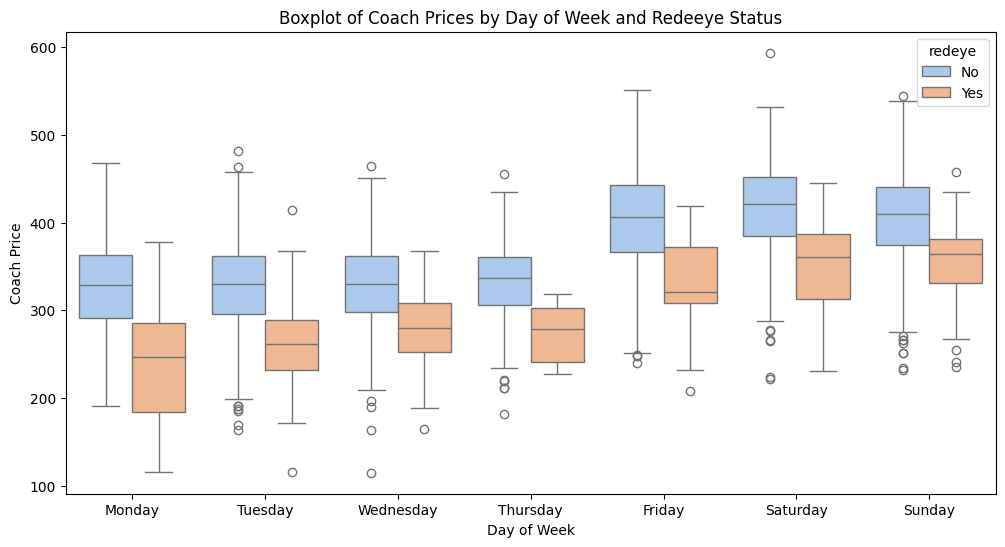

In [30]:
# 8 how do coach prices differ for redeyes and non-redeyes on each day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(data=flight_sub, x='day_of_week', y='coach_price', hue='redeye', palette='pastel', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Boxplot of Coach Prices by Day of Week and Redeeye Status')
plt.xlabel('Day of Week')
plt.ylabel('Coach Price')
plt.show()

The difference between redeyes and non-redeyes is pretty much the same on any day of the week, though on average weekend flights cost more than weekday flights